# Importing Libraries and loading data

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt

In [2]:
#load the cleaned dataframe
company_sales = pd.read_csv("company_sales.csv")
company_sales.describe()

price       category     birth_year            age
count  336713.000000  336713.000000  336713.000000  336713.000000
mean       17.215189       0.430156    1977.823568      46.176432
std        17.855445       0.591082      13.524433      13.524433
min         0.620000       0.000000    1929.000000      20.000000
25%         8.610000       0.000000    1971.000000      37.000000
50%        13.900000       0.000000    1980.000000      44.000000
75%        18.990000       1.000000    1987.000000      53.000000
max       300.000000       2.000000    2004.000000      95.000000

In [3]:
#adding month column and age_range columns, and dropping the date column
company_sales['month'] = pd.to_datetime(company_sales['date']).dt.to_period('M')
# change the datatypes for the 'month','price' &'category'
company_sales['month'] = company_sales['month'].astype({'month': 'object'})
company_sales['price'] = company_sales['price'].astype({'price': 'int64'})
company_sales['category'] = company_sales['category'].astype({'category': 'object'})
# create new column 'age_range' 
bins = [20, 30, 40, 50, 60, 70, 80, 90, np.inf]
names = ['20-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89','90-99']
company_sales['age_range'] = pd.cut(company_sales['age'], bins, labels=names)

# changing the datatypes to object 
company_sales['age_range'] = company_sales['age_range'].astype({'age_range': 'object'})

# Take sample of data to prevent overplotting
df = company_sales.sample(5000,random_state=5)
df = company_sales.sample(5000, random_state=5)

# Task 2

## Performing calculations for the indicators of central tendency and dispersion.

In [4]:
## we're going to write a 'loop': For each category, we create a sub-sample (subset) containing only the age and price of the current category.
## Mode is the “highest point” of the distribution, the Median is the value that divides the area in two
## Mean is the center of gravity of the distribution, as shown in the histograms below.
## Measures of dispersion: empirical variance. 
## Standard deviation measures if a variable is tightly or loosely clustered around the indicator of central tendency.

--------------------
1.0
mean”:
 49.06794317479926
med:
 48.0
mod:
 0    56
Name: age, dtype: int64
var:
 234.35733554711481
ect:
 15.308733962908716
skw:
 0.17071515277610982
kur:
 -0.44981567237888864


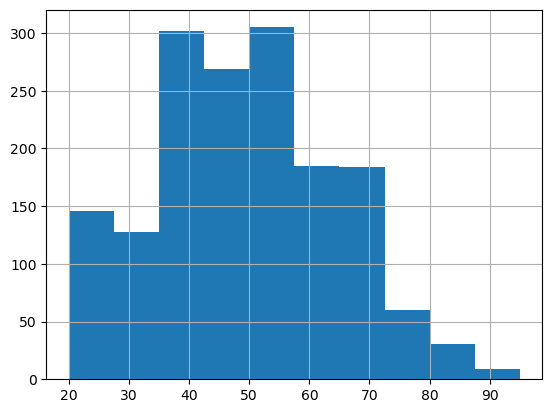

--------------------
0.0
mean”:
 45.93558673469388
med:
 44.0
mod:
 0    44
Name: age, dtype: int64
var:
 120.16549378839544
ect:
 10.962002270953763
skw:
 1.0516214206634726
kur:
 1.9619984343939607


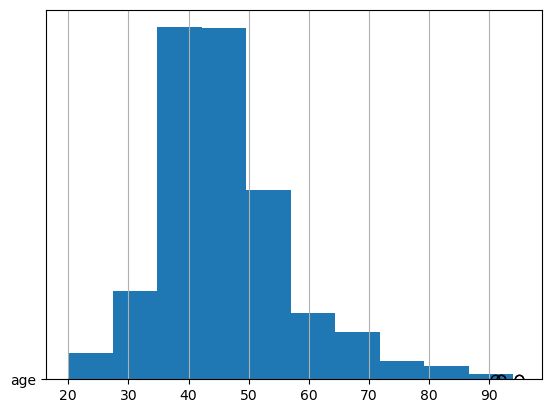

--------------------
2.0
mean”:
 27.4
med:
 26.0
mod:
 0    20
Name: age, dtype: int64
var:
 74.50122448979575
ect:
 8.631409183313913
skw:
 2.8899322675971852
kur:
 10.22546688946784


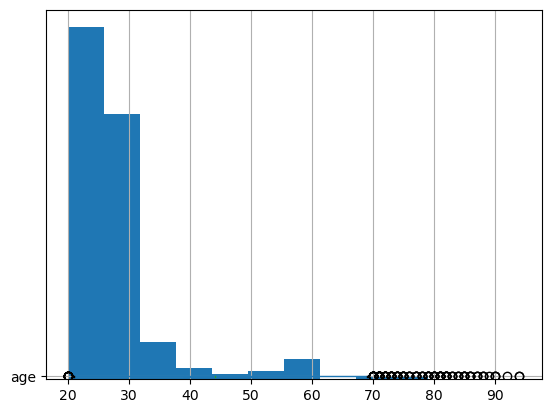

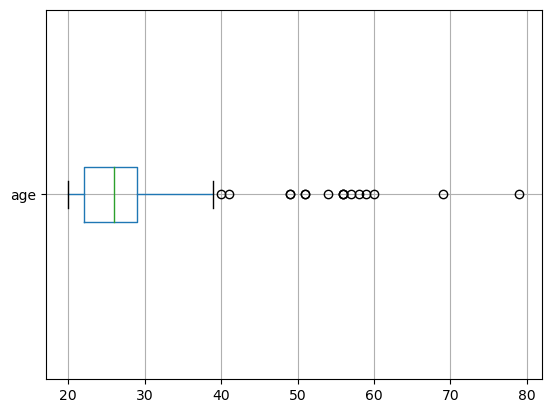

In [5]:
for cat in df["category"].unique():
    subset = df[df.category == cat] # Creation of sub-sample
    print("-"*20)
    print(cat)
    print("mean”:\n",subset['age'].mean())
    print("med:\n",subset['age'].median())
    print("mod:\n",subset['age'].mode())
    print("var:\n",subset['age'].var(ddof=0)) # calculates the empirical variance
    print("ect:\n",subset['age'].std(ddof=0)) # calculates standard deviation of the 'age' column
    print("skw:\n",subset['age'].skew())  # skewness is the measure of asymmetry
    print("kur:\n",subset['age'].kurtosis())  # empirical kurtosis measures 'peakedness'or 'flatness'
    subset["age"].hist() # Creates the histogram
    plt.show()  # Displays the histogram
    subset.boxplot(column="age", vert=False)
    plt.show

--------------------
1.0
mean”:
 19.661519456454602
med:
 18.0
mod:
 0    16
Name: price, dtype: int64
var:
 58.63651183578573
ect:
 7.657448128181198
skw:
 1.9158532614910668
kur:
 8.94832061310575


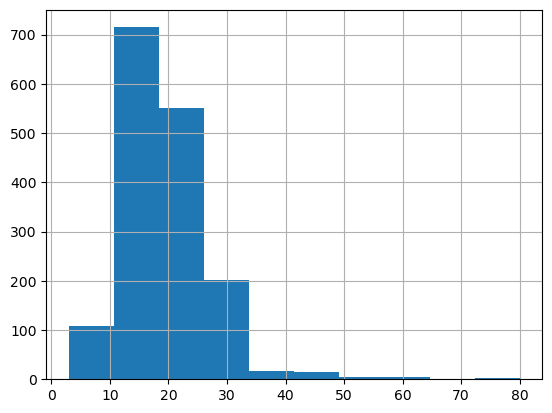

--------------------
0.0
mean”:
 9.888073979591837
med:
 9.0
mod:
 0    4
Name: price, dtype: int64
var:
 24.02223021901675
ect:
 4.901247822648509
skw:
 0.4122198787636905
kur:
 -0.5455825894801265


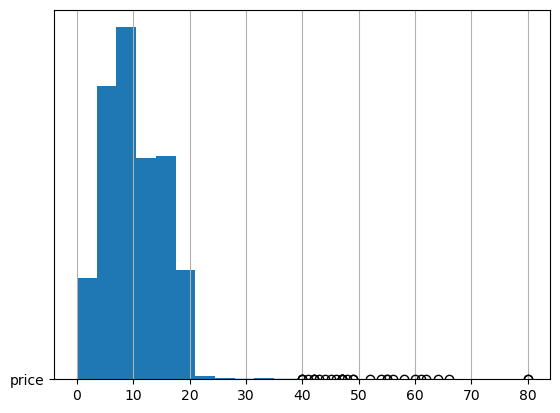

--------------------
2.0
mean”:
 71.68979591836735
med:
 62.0
mod:
 0    69
Name: price, dtype: int64
var:
 1405.699691795085
ect:
 37.492661839286434
skw:
 2.9775598875585483
kur:
 9.839593694324279


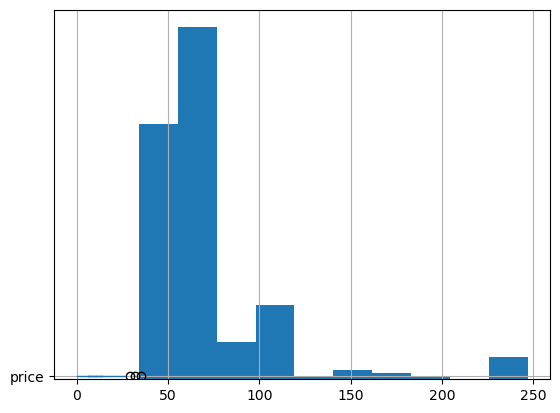

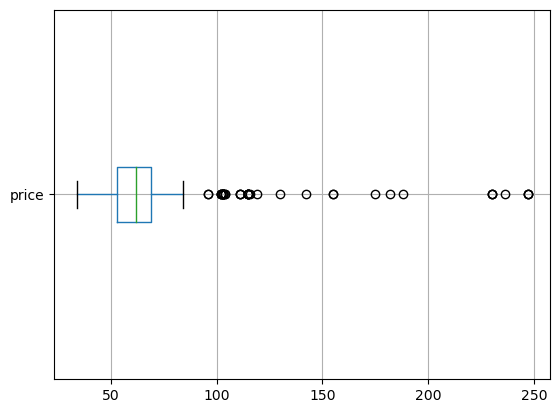

In [6]:
for cat in df["category"].unique():
    subset = df[df.category == cat] # Creation of sub-sample
    print("-"*20)
    print(cat)
    print("mean”:\n",subset['price'].mean())
    print("med:\n",subset['price'].median())
    print("mod:\n",subset['price'].mode())
    print("var:\n",subset['price'].var(ddof=0)) # calculates the empirical variance
    print("ect:\n",subset['price'].std(ddof=0)) # calculates standard deviation of the 'price' column
    print("skw:\n",subset['price'].skew())  # skewness is the measure of asymmetry
    print("kur:\n",subset['price'].kurtosis())  # empirical kurtosis measures 'peakedness'or 'flatness'
    subset["price"].hist() # Creates the histogram
    plt.show()  # Displays the histogram
    subset.boxplot(column="price", vert=False)
    plt.show

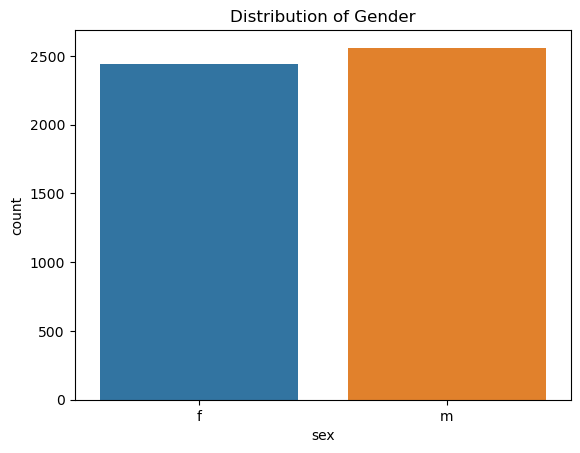

In [7]:
sns.countplot(x='sex', data=df);
plt.title('Distribution of Gender');

#### There is slightly a higher number of men compared to women customers.

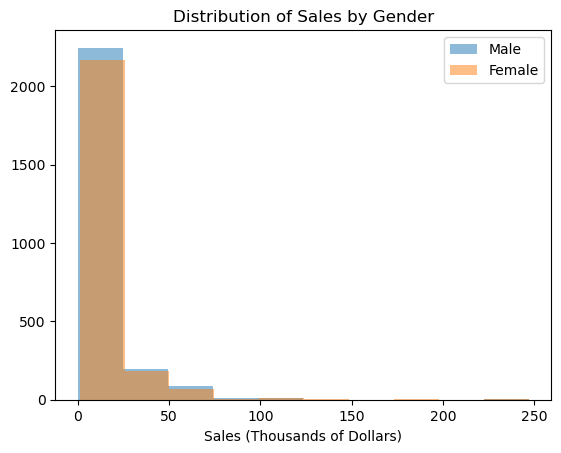

In [8]:
# Histogram of total purchases by gender
plt.hist('price', data=df[df['sex'] == 'm'], alpha=0.5, label='Male');
plt.hist('price', data=df[df['sex'] == 'f'], alpha=0.5, label='Female');
plt.title('Distribution of Sales by Gender');
plt.xlabel('Sales (Thousands of Dollars)');
plt.legend();

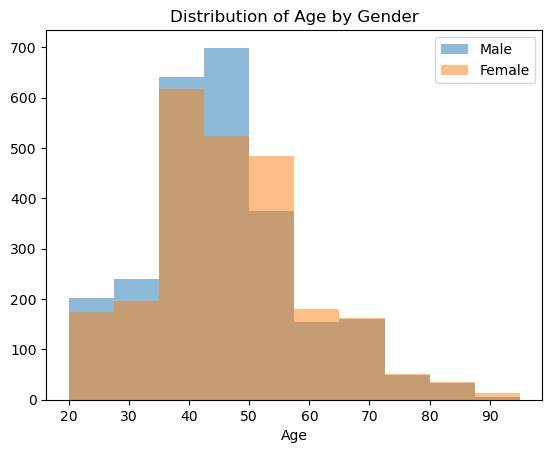

In [9]:
plt.hist('age', data=df[df['sex'] == 'm'], alpha=0.5, label='Male');
plt.hist('age', data=df[df['sex'] == 'f'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

#### The male customers in this data set tend to be younger than the female customers. We can see a spike around the age of 40-50 where majority of males fall.

## Concentration analysis, using a Lorenz curve and a Gini coefficient

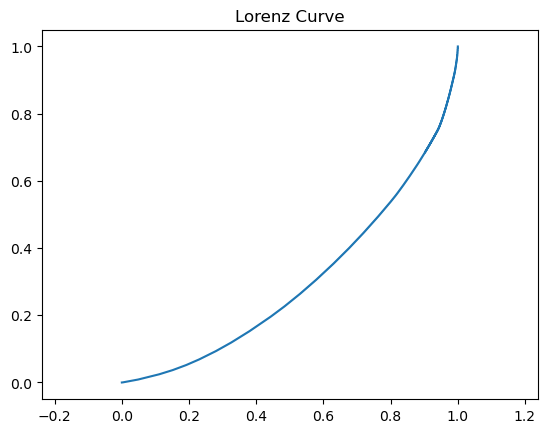

0.4001412682262837


In [10]:
import numpy as np
pricing = df[df['price'] > 0]
prc = pricing['price'].values
n = len(prc)
lorenz = np.cumsum(np.sort(prc)) / prc.sum()
lorenz = np.append([0],lorenz) # the curve starts at '0'

plt.axes().axis('equal')
xaxis = np.linspace(1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. 
##The first segment starts at 0-1/n and the last one finishes at 1+1/n
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title('Lorenz Curve')
plt.show()
# calculate the gini coefficient
# The Gini coefficient quantifies how far the Lorenz curve deviates from the “line of equality.”
# The line of equality corresponds to perfect equality, where everyone has the same income or consumption.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfway below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
print(gini)
#  Gini coefficient of 0.40 indicates that there is some inequality in the price distribution, but it’s not extreme.

## Time Series graph

In [11]:
## In 2.1 we have generated univariate models: Histograms & Boxplots for categories 0,1, 2.
## This time series graph is a bar graph for total purchases by month.

Text(0.5, 1.0, 'Total Purchases by Month')

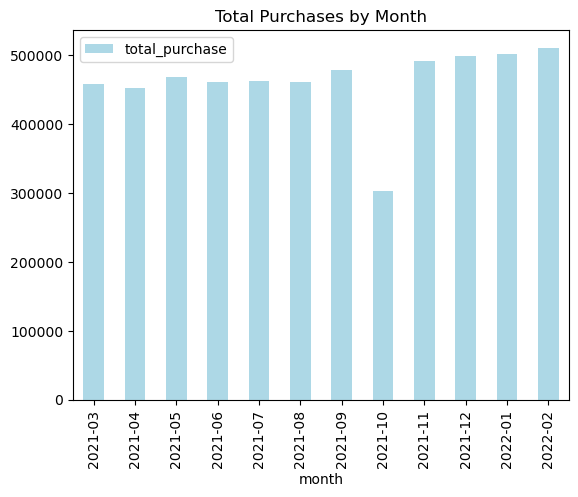

In [12]:
df1 = company_sales
df1['total_purchase'] = df1['price']
time_series = df1.groupby(by='month').sum()
fig2=time_series.plot.bar(y='total_purchase',color='lightblue')
fig2=fig2.get_figure()
fig2.savefig('date1.png')
plt.title("Total Purchases by Month")

<Axes: >

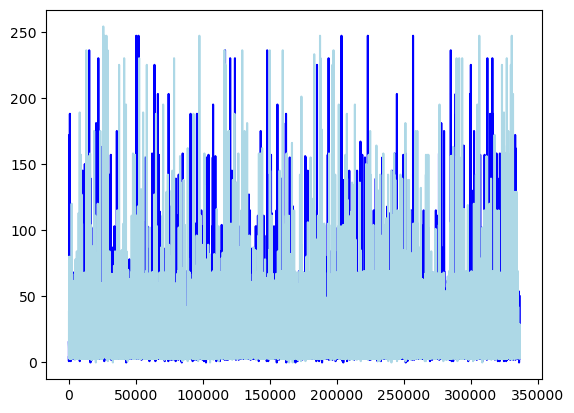

In [13]:
oct_sales= company_sales.loc[(company_sales['date']>'2021-10-01') & (company_sales['date']<'2021-10-31')]
oct_sales['price'].plot(color='blue')
nov_sales = company_sales.loc[(company_sales['date']>'2021-11-01') & (company_sales['date']<'2021-11-30')]
nov_sales['price'].plot(color='lightblue')

In [14]:
print(oct_sales["category"].value_counts())
print(nov_sales['category'].value_counts())

category
0.0    18196
1.0     1324
2.0     1119
Name: count, dtype: int64
category
0.0    14169
1.0    11821
2.0     1316
Name: count, dtype: int64


## Bivariate Analyses - Correlation

### A correlogram or correlation matrix allows to analyze the relationship between each pair of numeric variables of a matrix. The correlation is visualised as a scatterplot.

C:\Users\dinad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


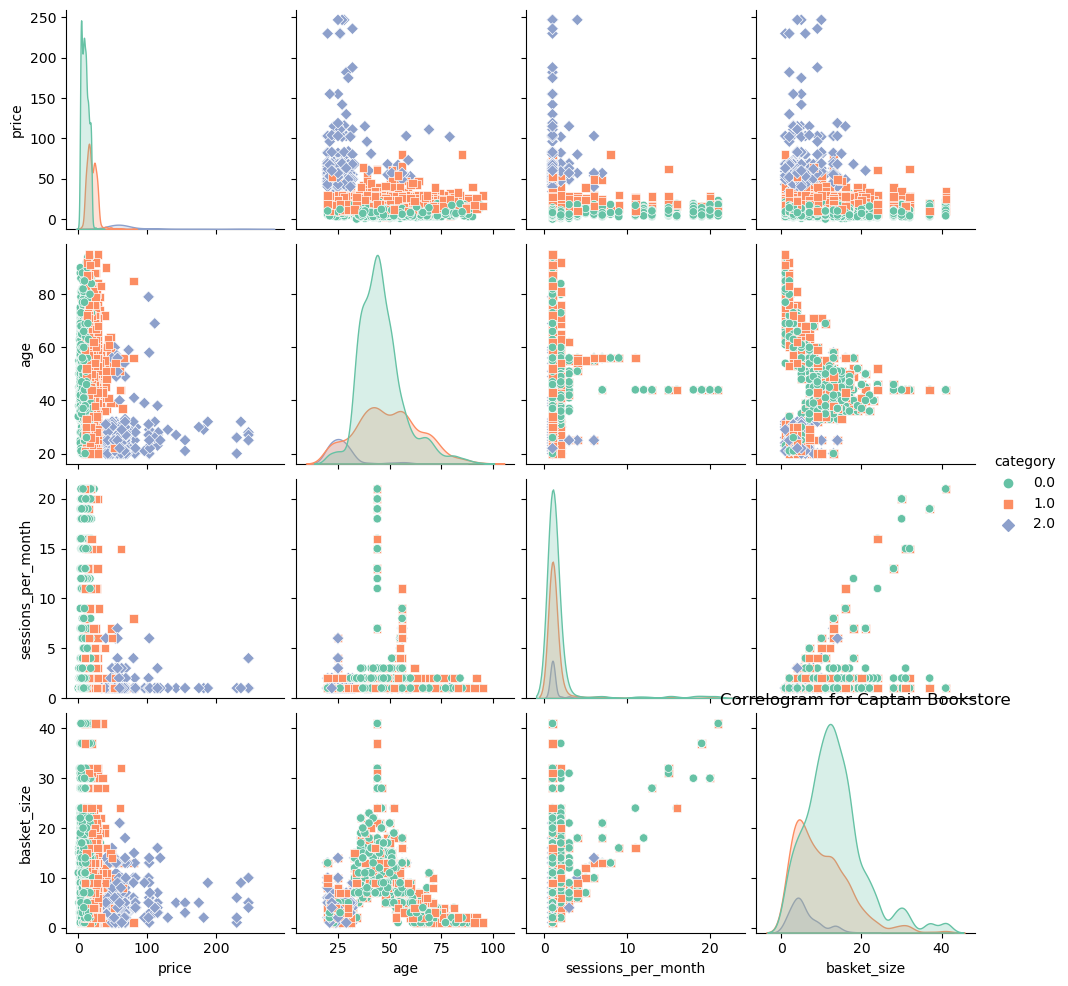

In [25]:
### Correlogram
### dataset is the subset of 'df'
df_cor2 = df[['price','category','age','sex','sessions_per_month','basket_size']]



# Basic correlogram
sns.pairplot(df_cor2,kind="scatter", hue="category", markers=["o", "s", "D"], palette="Set2")
plt.title('Correlogram for Captain Bookstore')
plt.show()

#### Quick Overview using heatmap or colored contingency table to see if there is any correlation between age, category, price and product_id. There are slight correlations between age and price, and age and category of products purchased.

Text(0.5, 1.0, 'Heat Map for Age, Category, Price and Product Id')

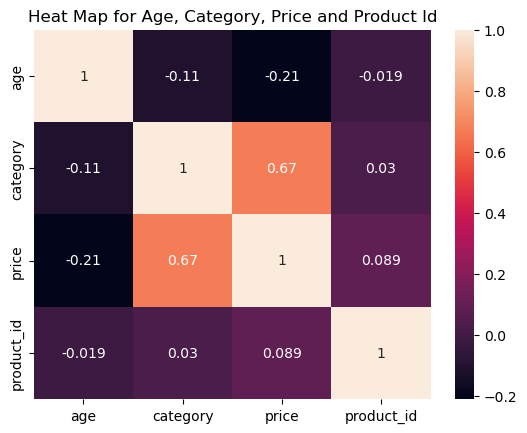

In [26]:
## This Heatmap shows the Pearson correlation, It shows negative correlation between age and price > age and category.
cs = df[['age','category','price','product_id']]
sns.heatmap(cs.corr(), annot=True)
plt.title('Heat Map for Age, Category, Price and Product Id')

# Task 3

### Gender vs Categories of products purchased
#### Analysis using a contingency table. 

In [28]:
dfgc = df[['sex','category']]

In [29]:
dfgc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 53515 to 235622
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       5000 non-null   object
 1   category  5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


In [30]:
X = "category"
Y = "sex"

cont = dfgc[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

sex          f     m  Total
category                   
0.0       1528  1608   3136
1.0        800   819   1619
2.0        112   133    245
Total     2440  2560   5000

In [31]:
tx = pd.DataFrame(tx)

ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(dfgc)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # Null values are replaced by 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
print(xi_n)
sns.heatmap(measure/xi_n,annot=c)
plt.show()

NameError: name 'tx' is not defined

In [32]:
(measure/xi_n)*100

NameError: name 'measure' is not defined

#### The Contingency table = 'cont' above shows almost equal values between genders. There is a slight correlation here between genders and categories purchased.

### Scatterplot with Regression Line: Age vs Total Purchases

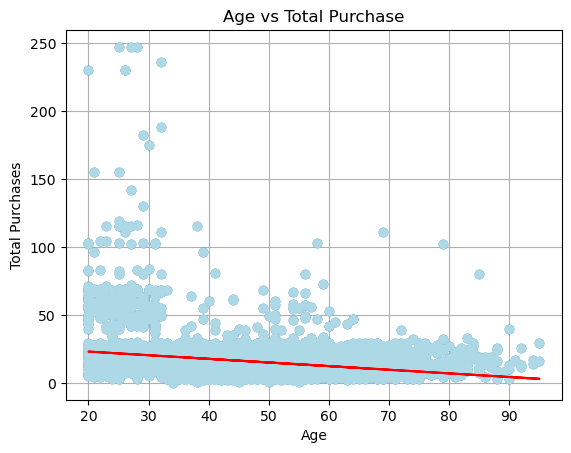

In [33]:

# Example data (you can replace this with your own data)
x = df.age
y = df.price

# Create a basic scatterplot
plt.plot(x, y, 'o')

# Obtain the slope (m) and intercept (b) of the linear regression line
m, b = np.polyfit(x, y, 1)

# Add the linear regression line to the scatterplot
plt.plot(x, m * x + b)

# Customize colors (optional)
plt.plot(x, y, 'o', color='lightblue')  # Individual points in green
plt.plot(x, m * x + b, color='red')  # Regression line in red

# Show the plot
plt.xlabel("Age")
plt.ylabel("Total Purchases")
plt.title("Age vs Total Purchase")
plt.grid(True)
plt.show()

In [34]:
# Calculate the correlation coefficient
df_cor = df[['age','price']]
correlation_coefficient = df_cor.corr().loc['age', 'price']
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.3f}")
## R is -0.210: Mild negative correlation.
### Note: If (r) is close to 0, there is little to no linear relationship.

Pearson Correlation Coefficient: -0.210


In [35]:
import statsmodels.api as sm

# Define response variable (y) and explanatory variable (x)
y = df_cor['price']
x = df_cor['age']
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()
print(model.summary())
## R-squared value is 0.044. Mild correlation.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.46e-51
Time:                        18:29:33   Log-Likelihood:                -21092.
No. Observations:                5000   AIC:                         4.219e+04
Df Residuals:                    4998   BIC:                         4.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.3776      0.842     33.696      0.0

### Age and the monthly purchase frequency

In [36]:
# We are going to analyze if there is a correlation between two quantitative variables here: age & purchase frequency.

# Count the number of sessions per month by customer_id.
df['sessions_per_month'] = df.groupby(['month','customer_id'])['session_id'].transform('size')
mpf = df[['age_range','sessions_per_month']].sort_values(by="age_range")
mpf.head()

age_range  sessions_per_month
119477     20-29                   1
97333      20-29                   1
184772     20-29                   3
245539     20-29                   1
303533     20-29                   1

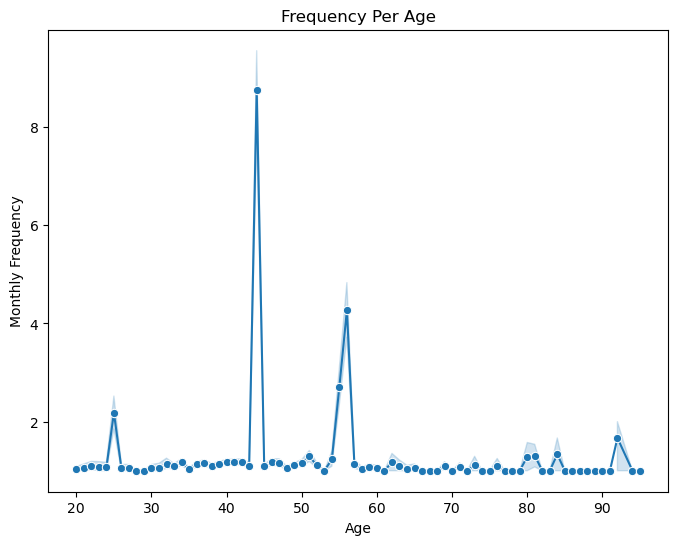

In [49]:
plt.figure(figsize=(8, 6)) # Width and Height of the chart
sns.lineplot(x='age',
             y='sessions_per_month',
             data=df_cor3,
             marker='o', # Style used to mark the join between 2 points
            )
plt.xlabel('Age') # x-axis name
plt.ylabel('Monthly Frequency') # y-axis name
plt.title('Frequency Per Age') # Add a title
plt.show() # Display the graph

In [62]:
df_cor3 = df[['age','sessions_per_month']]
correlation_coefficient = df_cor3.corr().loc['age', 'sessions_per_month']
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.3f}")

Pearson Correlation Coefficient: -0.009


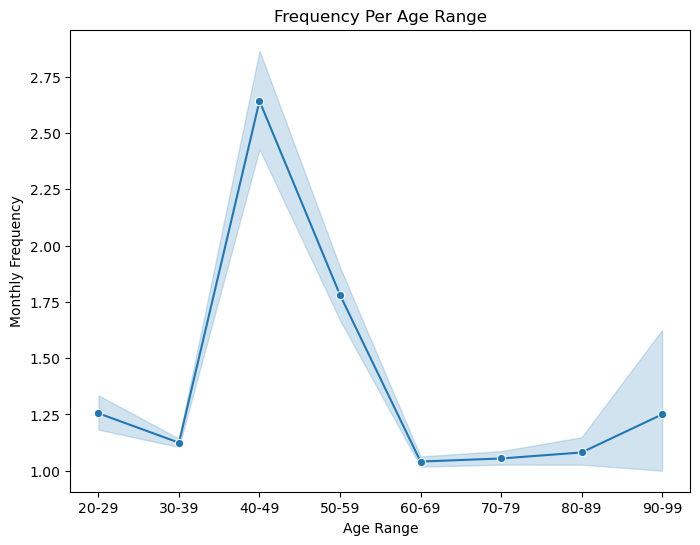

In [61]:
plt.figure(figsize=(8, 6)) # Width and Height of the chart
sns.lineplot(x='age_range',
             y='sessions_per_month',
             data=mpf,
             marker='o', # Style used to mark the join between 2 points
            )
plt.xlabel('Age Range') # x-axis name
plt.ylabel('Monthly Frequency') # y-axis name
plt.title('Frequency Per Age Range') # Add a title
plt.show() # Display the graph

In [63]:
import scipy.stats as st
import numpy as np
st.pearsonr(df["age"],df["sessions_per_month"])[0]
np.cov(df["age"],df["sessions_per_month"],ddof=0)[1,0]

-0.33283263999999996

### Age and The average basket size (in number of items)

In [19]:
# to calculate number of items purchased (basket size), we use transform size to calculate the product id by month and age range.
df['basket_size'] = df.groupby(['month','age'])['product_id'].transform('size')
# selecting applicable columns
avb = df[['age','sessions_per_month','basket_size']]
# 
avb['avg_basket_size'] = avb['basket_size']/avb['sessions_per_month']

avb = avb.groupby(by='age').mean().reset_index()


avb = avb.round()

avb

C:\Users\dinad\AppData\Local\Temp\ipykernel_3048\1414516862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avb['avg_basket_size'] = avb['basket_size']/avb['sessions_per_month']


age  sessions_per_month  basket_size  avg_basket_size
0    20                 1.0          9.0              9.0
1    21                 1.0          4.0              4.0
2    22                 1.0          4.0              4.0
3    23                 1.0          3.0              3.0
4    24                 1.0          3.0              3.0
..  ...                 ...          ...              ...
70   90                 1.0          1.0              1.0
71   91                 1.0          1.0              1.0
72   92                 2.0          2.0              1.0
73   94                 1.0          1.0              1.0
74   95                 1.0          1.0              1.0

[75 rows x 4 columns]

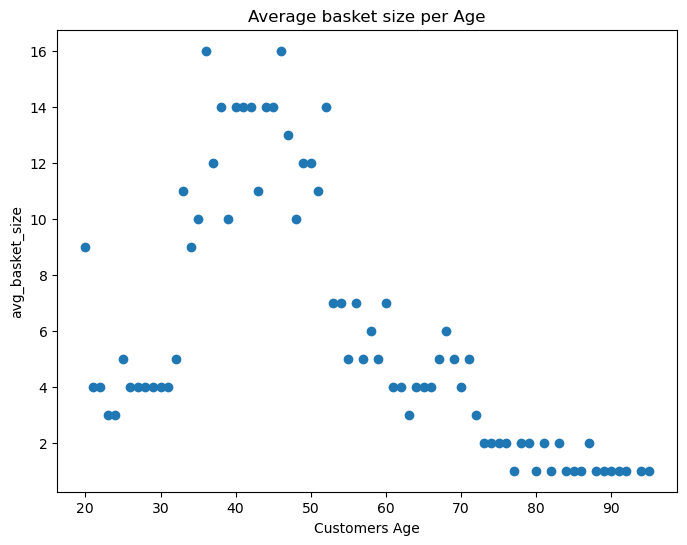

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(avb['age'],avb['avg_basket_size'])
plt.ylabel("avg_basket_size")
plt.xlabel('Customers Age')
plt.title("Average basket size per Age")
plt.show()

In [21]:
# Calculate the correlation coefficient
correlation_coefficient = avb.corr().loc['age', 'avg_basket_size']
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.3f}")

Pearson Correlation Coefficient: -0.568


### Age and Categories of purchased products.

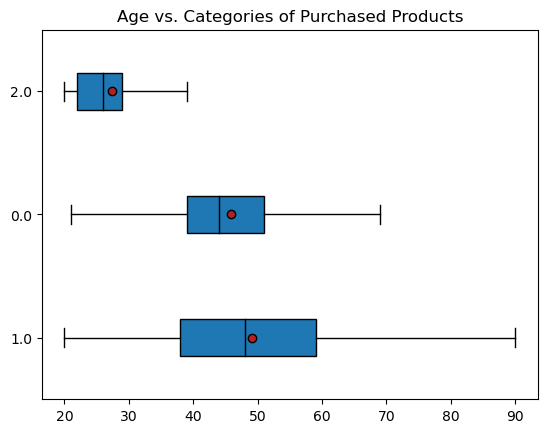

0.11436807428861405

In [22]:
X = "category" # qualitative
Y = "age" # quantitative
data = df
# Only purchases are retained
sub_sample = data[data["price"] > 0].copy()
# quantitative variable and a qualitative variable box plots
categories = sub_sample[X].unique()
groups = []
for m in categories:
    groups.append(sub_sample[sub_sample[X]==m][Y])
    
# Graph properties (not very important)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
            
plt.boxplot(groups, labels=categories, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Age vs. Categories of Purchased Products')
plt.show()

def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS
 
eta_squared(sub_sample[X],sub_sample[Y])

#### eta-squared value for age vs categories purchased is 0.11. The effect size of age is low on the categories of products purchased.

### Age and average order value

In [23]:
aov = df.groupby(by="age_range")['price'].mean().reset_index()
aov

age_range      price
0     20-29  39.445000
1     30-39  13.805982
2     40-49  12.013490
3     50-59  14.794928
4     60-69  15.213740
5     70-79  15.695652
6     80-89  15.783784
7     90-99  18.000000

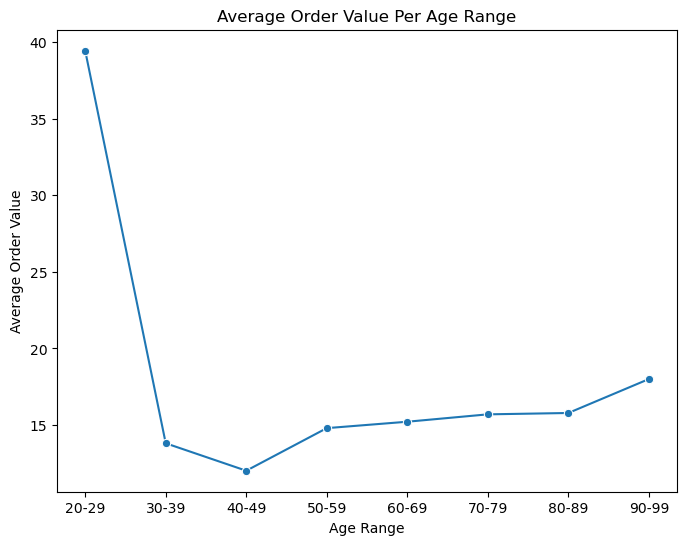

In [24]:
plt.figure(figsize=(8, 6)) # Width and Height of the chart
sns.lineplot(x='age_range',
             y='price',
             data=aov,
             marker='o', # Style used to mark the join between 2 points
            )
plt.xlabel('Age Range') # x-axis name
plt.ylabel('Average Order Value') # y-axis name
plt.title('Average Order Value Per Age Range') # Add a title
plt.show() # Display the graph